In [1]:
import pandas as pd
import glob
import os
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
dropbox_dir = "/Users/kendraziegler/Dropbox (Palmer Lab)"

#dropbox_dir = "C:/Users/cocoy/Dropbox (Palmer Lab)"
meta_dir = dropbox_dir + "/Suzanne_Mitchell_U01/Data-locomotor"


In [3]:
#Creating one dataframe with all locomotor files
#Must manually unzip all folders
#Must combine locomotor 5 files from T1&T2 and T3&T4 into one file named comprehensive_output_files
#Will not be doing analysis on C06 or C07
cohorts_dir = ['Shipment1_locomotor',
               'Shipment2_locomotor',
               'Shipment3_locomotor',
               'Shipment4_locomotor',
               'Shipment5_locomotor',
               'Shipment6_locomotor']
               #'ShipR_locomotor']

zip_folder = ['U01_Shipment1_Locomotor/comprehensive-output-files/',
              'U01_Shipment2_Locomotor/S2-comprehensive-output-files/',
              'U01-Shipment3_Locomotor/S3-comprehensive-out-files/',
              'comprehensive_output_files/comprehensive_output_files/',
              'comprehensive-output-files/',
              'Ship6-comprehensive-output-files/S6-comprehensive-out-files/']
              #'R-comprehensive-output-files/R-comprehensive-output-files/']
dir_dict = {cohorts_dir[i]: zip_folder[i] for i in range(len(cohorts_dir))}
count = 0
df_excel = pd.DataFrame()
df_csv = pd.DataFrame()
for cohort_dir,zip_folder in dir_dict.items():
        #for cohort in cohort_list:
        raw_dir = meta_dir + "/" + cohort_dir + "/" + zip_folder
        os.chdir(raw_dir)
        for file in os.listdir(raw_dir):
            if file.endswith('.xlsx'):
                df_excel = df_excel.append(pd.read_excel(file), ignore_index=True)
            elif file.endswith('.csv'):
                count += 1
                #print(file)
                df_csv = df_csv.append(pd.read_csv(file, skiprows = 58), ignore_index=True)

                
df_csv
#print(count)

,EXPERIMENT,CAGE,SUBJECT ID,SUBJECT TYPE,SUBJECT SEX,SUBJECT AGE,SUBJECT TREATMENT,BATCH,PHASE,SAMPLE,...,AMBULATORY EPISODE MEDIAN VELOCITY (cm/s),LEFT-FRONT TIME LEGACY (s),RIGHT-FRONT TIME LEGACY (s),LEFT-REAR TIME LEGACY (s),RIGHT-REAR TIME LEGACY (s),MARGIN TIME LEGACY (s),CENTER TIME LEGACY (s),MARGIN DISTANCE LEGACY (cm),CENTER DISTANCE LEGACY (cm),Unnamed: 44
0,U01-t1-gp5,Cage 1,46179,9-black,Unknown,11,NaN,Batch 1,Phase 1,1,...,14.31,1.00,1.88,0.00,1.06,35.51,24.49,100.72,131.26,NaN
1,U01-t1-gp5,Cage 1,46179,9-black,Unknown,11,NaN,Batch 1,Phase 1,2,...,19.68,0.00,0.00,0.00,6.47,47.35,12.65,152.35,103.79,NaN
2,U01-t1-gp5,Cage 1,46179,9-black,Unknown,11,NaN,Batch 1,Phase 1,3,...,16.80,0.75,0.00,0.00,0.33,35.38,24.62,127.90,204.45,NaN
3,U01-t1-gp5,Cage 1,46179,9-black,Unknown,11,NaN,Batch 1,Phase 1,4,...,16.07,0.00,0.00,0.00,7.55,40.35,19.66,61.70,114.53,NaN
4,U01-t1-gp5,Cage 1,46179,9-black,Unknown,11,NaN,Batch 1,Phase 1,5,...,10.51,0.00,0.28,0.00,1.81,38.65,21.35,76.74,153.27,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21010,U01-t2-gp17,Cage 4,87382,34-mixed/brown,Unknown,12,NaN,Batch 1,Ship6,11,...,10.06,0.00,0.03,0.75,0.00,48.49,11.52,62.81,46.24,NaN
21011,U01-t2-gp17,Cage 4,87382,34-mixed/brown,Unknown,12,NaN,Batch 1,Ship6,12,...,15.19,0.52,0.00,0.00,2.42,39.58,20.42,87.31,67.05,NaN
21012,U01-t2-gp17,Cage 4,87382,34-mixed/brown,Unknown,12,NaN,Batch 1,Ship6,13,...,5.82,0.00,0.00,25.22,0.03,57.81,2.19,44.51,11.63,NaN
21013,U01-t2-gp17,Cage 4,87382,34-mixed/brown,Unknown,12,NaN,Batch 1,Ship6,14,...,0.00,0.00,0.00,59.91,0.00,60.00,0.00,0.00,0.00,NaN


In [4]:
#need to enter C07 separately due to some unknow error
# df_excel_r = pd.DataFrame()
# df_csv_r = pd.DataFrame()
# raw_dir_r = meta_dir + "/" + 'ShipR_locomotor' + "/" + 'R-comprehensive-output-files/R-comprehensive-output-files/'
# os.chdir(raw_dir_r)
# for file in os.listdir(raw_dir_r):
#     if file.endswith('.xlsx'):
#         df_excel_r = df_excel_r.append(pd.read_excel(file), ignore_index=True)
#     elif file.endswith('.csv'):
#                 #print(file)
#         df_csv_r = df_csv_r.append(pd.read_csv(file, skiprows = 58), ignore_index=True)
#df_csv_r.EXPERIMENT.value_counts()
#df_csv_r

In [5]:
#concat dataframes to be one. C07 added to other cohorts
#df_csv = pd.concat([df_csv,df_excel_r])
#df_csv_r.loc[df_csv_r['SUBJECT ID'] == 24688]

In [6]:
def format_df_csv(df_csv):
    #make column headers uniform
    df_csv.columns = df_csv.columns.str.replace(':','')
    df_csv.columns = df_csv.columns.str.replace(' ','_')
    df_csv.columns = df_csv.columns.str.lower()
    
    df_csv.rename(columns={'subject_id':'rfid','duration_(s)':'duration','total_distance_(cm)':'total_distance',
                           'total_distance_x-axis_(cm)':'total_distance_x','total_distance_y-axis_(cm)':
                           'total_distance_y','rest_time_(s)':'rest_time','movement_time_(s)':'movement_time',
                           'ambulatory_time_(s)':'ambulatory_time','stereotypy_time_(s)':'stereotypy_time',
                           'vertical_activity_time_(s)':'vertical_activity_time','ambulatory_episode_average_velocity_(cm/s)':
                           'ambulatory_episode_average_velocity','ambulatory_episode_peak_average_velocity_(cm/s)':
                           'ambulatory_episode_peak_average_velocity','ambulatory_episode_median_velocity_(cm/s)':
                           'ambulatory_episode_median_velocity','left-front_time_legacy_(s)':'left-front_time_legacy',
                           'right-front_time_legacy_(s)':'right_front_time_legacy','counter-clockwise_revolutions':
                           'counter_clockwise_revolutions','left-rear_time_legacy_(s)':'left_rear_time_legacy',
                           'right-rear_time_legacy_(s)':'right_rear_time_legacy','margin_time_legacy_(s)':
                           'margin_time_legacy','center_time_legacy_(s)':'center_time_legacy','margin_distance_legacy_(cm)':
                           'margin_distance_legacy','center_distance_legacy_(cm)':'center_distance_legacy'},inplace = True)
    
    #Remove uneccesary columns
    #Below: column header(only value contained in column)
    #subject_sex(unknown), subject_treatment(NaN),unnamed_44(NaN),batch(batch 1), duration(60)
    df_csv.drop(['subject_sex', 'subject_treatment','unnamed_44','batch','duration'], axis=1, inplace = True)
    
    return df_csv
    

        
        

#format_df_csv(df_csv_r)
df_csv = format_df_csv(df_csv)

#df_csv_r



In [7]:
#Load in master sheet in order to get the cohort value
#dropbox_dir = r'C:/Users/cocoy/Dropbox (Palmer Lab)/Palmer Lab/Shae Ziegler/Suzanne_Mitchell_U01'
dropbox_dir = r'/Users/kendraziegler/Dropbox (Palmer Lab)/Palmer Lab/Shae Ziegler/Suzanne_Mitchell_U01'
#creat last_5 column in order to compare with locomotor files
df_wfu = pd.read_csv(dropbox_dir + '/wfu_master.csv')
df_wfu['rfid'] = df_wfu['rfid'].astype(str)
df_wfu['last_5'] = df_wfu['rfid'].str.replace('9330003200','')
df_wfu['last_5'] = df_wfu['last_5'].str.replace('9330003201','')
df_wfu

,cohort,sires,dames,labanimalid,accessid,sex,rfid,dob,dow,shipmentdate,...,coatcolor,earpunch,rack,shipmentbox,housingbox,shipmentage,weanage,comments,resolution,last_5
0,C01,72539_1,72595_5,TJ008,73472_2,F,933000320045906,2018-09-24,2018-10-15,2018-10-30,...,BROWNHOOD,RB,D-F4,2.0,9999.0,36.0,21.0,Pregnant female/Impregnated,REMOVE_FROM_EXCLUSION_AND_REPLACE,45906
1,C01,73358_1,73360_1,TJ027,73477_2,F,933000320045890,2018-09-25,2018-10-16,2018-10-30,...,BROWNHOOD,LM,D-G8,4.0,32.0,35.0,21.0,NaN,NaN,45890
2,C01,72539_1,72595_5,TJ003,73472_8,M,933000320045902,2018-09-24,2018-10-15,2018-10-30,...,ALBINO,RT,D-F2,2.0,9999.0,36.0,21.0,Pregnant female/Impregnated,REMOVE_FROM_EXCLUSION_AND_REPLACE,45902
3,C01,72794_1,72775_4,TJ020,73475_4,F,933000320045904,2018-09-25,2018-10-16,2018-10-30,...,BROWN,RB,D-G2,2.0,9999.0,35.0,21.0,Pregnant female/Impregnated,REMOVE_FROM_EXCLUSION_AND_REPLACE,45904
4,C01,72624_1,72596_4,TJ002,73471_5,F,933000320045908,2018-09-23,2018-10-15,2018-10-30,...,BLACK,LT,D-F2,2.0,9999.0,37.0,22.0,Pregnant female/Impregnated,REMOVE_FROM_EXCLUSION_AND_REPLACE,45908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896,C07,933000320048190,933000320187377,NaN,NaN,F,933000320125436,2020-08-09,2020-09-04,NaN,...,BLACK,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN,25436
897,C07,933000320187153,933000320187383,NaN,NaN,F,933000320125437,2020-08-09,2020-09-04,NaN,...,BROWNHOOD,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN,25437
898,C07,933000320187217,933000320048245,NaN,NaN,F,933000320125440,2020-08-09,2020-09-04,NaN,...,BROWN,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN,25440
899,C07,933000320187249,933000320048234,NaN,NaN,M,933000320125443,2020-08-08,2020-09-04,NaN,...,BLACKHOOD,NaN,NaN,NaN,NaN,NaN,27.0,NaN,NaN,25443


In [9]:
#All error corrections


#87713 is in C05 but cannot be found in wfu_master
#87713 is a typo and should be 87173
#missing_cohort = locomotor_all[locomotor_all['cohort'].isna()]
#locomotor_all[locomotor_all['rfid'] == '933000320187173']
def fix_rfid(df):
    df['rfid'] = df['rfid'].astype(str)
    df.loc[(df.rfid == '87713'),'rfid'] = '87173'

#need to remove 933000320046763 from file U01-t2-gp13; rat had tail injury in first file
#file U01-t2-gp13-B contains the correct data for rat
#will remove 15 rows from table
def remove_incorrect(df):
    df.drop(df.loc[(df.experiment == 'U01-t2-gp13') & (df.rfid == '46763')].index, inplace = True)
    df.loc[(df.experiment == 'U01-t2-gp13-B'),'experiment'] = 'U01-t2-gp13'
    
#There is no U01-t1-gp2 in C05. Assume U01-t1-gp2a is its replacement
def file_rename(df):
    df.loc[(df.experiment == 'U01-t1-gp2a'),'experiment'] = 'U01-t1-gp2'
    #extra_file = locomotor_all[locomotor_all['experiment'] == 'U01-t1-gp2a']
    
remove_incorrect(df_csv)
fix_rfid(df_csv)
file_rename(df_csv)


In [11]:
def splitting_cells(df):
    df['cage'] = df['cage'].str.replace('Cage ','')
    #df['phase'] = df['phase'].str.replace('Phase ','')
    #split cell based on -
    df['U01'] = df.experiment.str.split('-', expand = True)[0]
    df['time'] = df.experiment.str.split('-', expand = True)[1]
    df['file_num'] = df.experiment.str.split('-', expand = True)[2]

splitting_cells(df_csv)
#splitting_cells(df_csv_r)

In [12]:
df_csv

,experiment,cage,rfid,subject_type,subject_age,phase,sample,start_time,total_distance,total_distance_x,...,right_front_time_legacy,left_rear_time_legacy,right_rear_time_legacy,margin_time_legacy,center_time_legacy,margin_distance_legacy,center_distance_legacy,U01,time,file_num
0,U01-t1-gp5,1,46179,9-black,11,Phase 1,1,2:04:08 PM,231.98,75.88,...,1.88,0.00,1.06,35.51,24.49,100.72,131.26,U01,t1,gp5
1,U01-t1-gp5,1,46179,9-black,11,Phase 1,2,2:05:08 PM,256.13,70.17,...,0.00,0.00,6.47,47.35,12.65,152.35,103.79,U01,t1,gp5
2,U01-t1-gp5,1,46179,9-black,11,Phase 1,3,2:06:08 PM,332.35,157.80,...,0.00,0.00,0.33,35.38,24.62,127.90,204.45,U01,t1,gp5
3,U01-t1-gp5,1,46179,9-black,11,Phase 1,4,2:07:08 PM,176.24,79.38,...,0.00,0.00,7.55,40.35,19.66,61.70,114.53,U01,t1,gp5
4,U01-t1-gp5,1,46179,9-black,11,Phase 1,5,2:08:08 PM,230.01,115.25,...,0.28,0.00,1.81,38.65,21.35,76.74,153.27,U01,t1,gp5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21010,U01-t2-gp17,4,87382,34-mixed/brown,12,Ship6,11,2:21:50 PM,109.06,63.18,...,0.03,0.75,0.00,48.49,11.52,62.81,46.24,U01,t2,gp17
21011,U01-t2-gp17,4,87382,34-mixed/brown,12,Ship6,12,2:22:50 PM,154.36,36.51,...,0.00,0.00,2.42,39.58,20.42,87.31,67.05,U01,t2,gp17
21012,U01-t2-gp17,4,87382,34-mixed/brown,12,Ship6,13,2:23:50 PM,56.14,38.42,...,0.00,25.22,0.03,57.81,2.19,44.51,11.63,U01,t2,gp17
21013,U01-t2-gp17,4,87382,34-mixed/brown,12,Ship6,14,2:24:50 PM,0.00,0.00,...,0.00,59.91,0.00,60.00,0.00,0.00,0.00,U01,t2,gp17


In [13]:
def format_for_calc(df_csv):
    #drop uneeded columns for calc
    #U01 contains part of title I manually split, uneeded
    #subject_type is incorrect coat color naming
    #subject_age are incorrec values
    #phase and start time provides no useful info
    df = df_csv.drop(['U01','subject_type','subject_age','start_time','phase'], axis=1)
    #reorganize columns
    df = df[['experiment', 'rfid', 'time',
       'file_num', 'sample','cage', 'total_distance', 'total_distance_x',
       'total_distance_y', 'horizontal_activity_count',
       'ambulatory_activity_count', 'rest_time', 'rest_episode_count',
       'movement_time', 'movement_episode_count', 'ambulatory_time',
       'ambulatory_episode_count', 'stereotypy_time',
       'stereotypic_episode_count', 'stereotypic_activity_count',
       'stereotypic_episode_activity_count', 'vertical_episode_count',
       'vertical_activity_count', 'vertical_activity_time', 'jump_count',
       'clockwise_revolutions', 'counter_clockwise_revolutions',
       'ambulatory_episode_average_velocity',
       'ambulatory_episode_peak_average_velocity',
       'ambulatory_episode_median_velocity', 'left-front_time_legacy',
       'right_front_time_legacy', 'left_rear_time_legacy',
       'right_rear_time_legacy', 'margin_time_legacy', 'center_time_legacy',
       'margin_distance_legacy', 'center_distance_legacy']]
    #Drop rows that will not be used for calculations: t3, t4 according to Mitchell
    df.drop(df.loc[df['time']=='t3'].index, inplace=True)
    df.drop(df.loc[df['time']=='t4'].index, inplace=True)

    return df


locomotor = format_for_calc(df_csv)
#locomotor_r = format_for_calc(df_csv_r)

In [14]:
locomotor

,experiment,rfid,time,file_num,sample,cage,total_distance,total_distance_x,total_distance_y,horizontal_activity_count,...,ambulatory_episode_peak_average_velocity,ambulatory_episode_median_velocity,left-front_time_legacy,right_front_time_legacy,left_rear_time_legacy,right_rear_time_legacy,margin_time_legacy,center_time_legacy,margin_distance_legacy,center_distance_legacy
0,U01-t1-gp5,46179,t1,gp5,1,1,231.98,75.88,80.33,570,...,28.33,14.31,1.00,1.88,0.00,1.06,35.51,24.49,100.72,131.26
1,U01-t1-gp5,46179,t1,gp5,2,1,256.13,70.17,107.95,517,...,18.69,19.68,0.00,0.00,0.00,6.47,47.35,12.65,152.35,103.79
2,U01-t1-gp5,46179,t1,gp5,3,1,332.35,157.80,113.67,596,...,19.75,16.80,0.75,0.00,0.00,0.33,35.38,24.62,127.90,204.45
3,U01-t1-gp5,46179,t1,gp5,4,1,176.24,79.38,44.77,324,...,36.77,16.07,0.00,0.00,0.00,7.55,40.35,19.66,61.70,114.53
4,U01-t1-gp5,46179,t1,gp5,5,1,230.01,115.25,71.76,451,...,17.83,10.51,0.00,0.28,0.00,1.81,38.65,21.35,76.74,153.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21010,U01-t2-gp17,87382,t2,gp17,11,4,109.06,63.18,26.67,215,...,23.30,10.06,0.00,0.03,0.75,0.00,48.49,11.52,62.81,46.24
21011,U01-t2-gp17,87382,t2,gp17,12,4,154.36,36.51,93.66,297,...,23.62,15.19,0.52,0.00,0.00,2.42,39.58,20.42,87.31,67.05
21012,U01-t2-gp17,87382,t2,gp17,13,4,56.14,38.42,15.24,112,...,18.08,5.82,0.00,0.00,25.22,0.03,57.81,2.19,44.51,11.63
21013,U01-t2-gp17,87382,t2,gp17,14,4,0.00,0.00,0.00,6,...,0.00,0.00,0.00,0.00,59.91,0.00,60.00,0.00,0.00,0.00


In [15]:
def drop_unwanted(locomotor):
    locomotor = locomotor.drop(labels=[ 'total_distance_x',
 'total_distance_y',
 'horizontal_activity_count',
 'ambulatory_activity_count',
 'movement_time',
 'ambulatory_time',
 'ambulatory_episode_count',
 'stereotypy_time',
 'stereotypic_episode_count',
 'stereotypic_activity_count',
 'stereotypic_episode_activity_count',
 'vertical_episode_count',
 'vertical_activity_time',
 'jump_count',
 'clockwise_revolutions',
 'counter_clockwise_revolutions',
 'ambulatory_episode_average_velocity',
 'ambulatory_episode_peak_average_velocity',
 'ambulatory_episode_median_velocity',
 'left-front_time_legacy',
 'right_front_time_legacy',
 'left_rear_time_legacy',
 'right_rear_time_legacy',
 'margin_time_legacy',
 'margin_distance_legacy',
 'center_distance_legacy'], axis=1)
    return locomotor
    
locomotor = drop_unwanted(locomotor)
#locomotor_r = drop_unwanted(locomotor_r)
list(locomotor.columns.values)

['experiment',
 'rfid',
 'time',
 'file_num',
 'sample',
 'cage',
 'total_distance',
 'rest_time',
 'rest_episode_count',
 'movement_episode_count',
 'vertical_activity_count',
 'center_time_legacy']

In [16]:
locomotor['rfid'].value_counts()

46763    45
46059    45
47840    30
47849    30
47532    30
         ..
87411    15
87435    15
87410    15
87409    15
87417    15
Name: rfid, Length: 600, dtype: int64

In [17]:
locomotor['experiment'].value_counts()

U01-t2-gp13     375
U01-t1-gp5      360
U01-t1-gp12     360
U01-t1-gp2      360
U01-t1-gp11     360
U01-t2-gp8      360
U01-t1-gp16     360
U01-t1-gp10     360
U01-t1-gp3      360
U01-t2-gp22     360
U01-t2-gp1      360
U01-t1-gp19     360
U01-t1-gp1      360
U01-t2-gp9      360
U01-t2-gp16     360
U01-t2-gp20     360
U01-t2-gp3      360
U01-t1-gp8      360
U01-t2-gp2      360
U01-t2-gp21     360
U01-t1-gp9      360
U01-t1-gp13     360
U01-t2-gp17     360
U01-t2-gp15     360
U01-t2-gp14     360
U01-t1-gp18     360
U01-t2-gp11     360
U01-t2-gp12     360
U01-t1-gp4      360
U01-t2-gp7      360
U01-t1-gp20     360
U01-t1-gp17     360
U01-t2-gp18     360
U01-t2-gp4      360
U01-t2-gp6      360
U01-t1-gp15     360
U01-t2-gp5      360
U01-t2-gp10     360
U01-t1-gp7      360
U01-t1-gp6      360
U01-t1-gp14     360
U01-t2-gp19     360
U01-t2-gp23     330
U01-t2-gp25     300
U01-t2-gp24     300
U01-t1-gp23     270
U01-t1-gp22     240
U01-t1-gp21     240
U01-t1-gp24     240
U01-t1-gp25     240


In [19]:
locomotor_t1 = locomotor[locomotor.time == 't1']
locomotor_t1 = locomotor_t1.add_prefix('locomotor_t1_')
locomotor_t1.rename(columns={'locomotor_t1_rfid':'rfid','locomotor_t1_cage':'cage',
                             'locomotor_t1_sample':'sample'},inplace = True)
locomotor_t1
#locomotor_t1['rfid'].value_counts()

# locomotor_t1_r = locomotor_r[locomotor_r.time == 't1']
# locomotor_t1_r = locomotor_t1_r.add_prefix('locomotor_t1_')
# locomotor_t1_r.rename(columns={'locomotor_t1_rfid':'rfid','locomotor_t1_cage':'cage',
#                              'locomotor_t1_sample':'sample'},inplace = True)
# locomotor_t1_r
# locomotor_t1_r['locomotor_t1_experiment'].value_counts()


,locomotor_t1_experiment,rfid,locomotor_t1_time,locomotor_t1_file_num,sample,cage,locomotor_t1_total_distance,locomotor_t1_rest_time,locomotor_t1_rest_episode_count,locomotor_t1_movement_episode_count,locomotor_t1_vertical_activity_count,locomotor_t1_center_time_legacy
0,U01-t1-gp5,46179,t1,gp5,1,1,231.98,5.13,4,5,131,24.49
1,U01-t1-gp5,46179,t1,gp5,2,1,256.13,6.10,5,6,121,12.65
2,U01-t1-gp5,46179,t1,gp5,3,1,332.35,3.64,3,4,141,24.62
3,U01-t1-gp5,46179,t1,gp5,4,1,176.24,15.63,8,9,106,19.66
4,U01-t1-gp5,46179,t1,gp5,5,1,230.01,6.02,3,4,126,21.35
...,...,...,...,...,...,...,...,...,...,...,...,...
20950,U01-t1-gp13,48189,t1,gp13,11,4,54.17,42.64,9,10,32,26.80
20951,U01-t1-gp13,48189,t1,gp13,12,4,0.00,37.36,6,7,58,9.14
20952,U01-t1-gp13,48189,t1,gp13,13,4,0.00,40.44,14,15,55,0.00
20953,U01-t1-gp13,48189,t1,gp13,14,4,226.07,16.80,9,9,70,13.02


In [20]:
locomotor_t2 = locomotor[locomotor.time == 't2']
locomotor_t2 = locomotor_t2.add_prefix('locomotor_t2_')
locomotor_t2.rename(columns={'locomotor_t2_rfid':'rfid','locomotor_t2_cage':'cage',
                             'locomotor_t2_sample':'sample'},inplace = True)
locomotor_t2
locomotor_t2['rfid'].value_counts()

# locomotor_t2_r = locomotor_r[locomotor_r.time == 't2']
# locomotor_t2_r = locomotor_t2_r.add_prefix('locomotor_t2_')
# locomotor_t2_r.rename(columns={'locomotor_t2_rfid':'rfid','locomotor_t2_cage':'cage',
#                              'locomotor_t2_sample':'sample'},inplace = True)
# len(locomotor_t2_r.locomotor_t2_experiment.value_counts())


46763    30
46059    30
87217    15
47538    15
47355    15
         ..
47777    15
47784    15
47645    15
47646    15
87382    15
Name: rfid, Length: 599, dtype: int64

In [22]:
locomotor_all = pd.merge(locomotor_t1, locomotor_t2, on=['rfid','sample'],how = 'outer')
#locomotor_all_r = pd.merge(locomotor_t1_r, locomotor_t2_r, on=['rfid','sample'],how = 'outer')

#locomotor_all_r.rfid.value_counts()

In [23]:
#need to calculate total for each rfid at each time
df_groups = locomotor_all.groupby([ 'rfid','cage_x','locomotor_t1_experiment','locomotor_t1_time',
                                   'locomotor_t1_file_num','locomotor_t2_time','locomotor_t2_file_num',
                                   'locomotor_t2_experiment'],
                                  as_index = False)[['sample',
                                                     'locomotor_t1_total_distance',
                                                     'locomotor_t1_rest_time',
                                                     'locomotor_t1_rest_episode_count',
                                                     'locomotor_t1_movement_episode_count',
                                                     'locomotor_t1_vertical_activity_count',
                                                     'locomotor_t1_center_time_legacy',
                                                     'locomotor_t2_total_distance',
                                                     'locomotor_t2_rest_time',
                                                     'locomotor_t2_rest_episode_count',
                                                     'locomotor_t2_movement_episode_count',
                                                     'locomotor_t2_vertical_activity_count',
                                                     'locomotor_t2_center_time_legacy']].sum()
#print(locomotor_all.columns)
df_groups


,rfid,cage_x,locomotor_t1_experiment,locomotor_t1_time,locomotor_t1_file_num,locomotor_t2_time,locomotor_t2_file_num,locomotor_t2_experiment,sample,locomotor_t1_total_distance,...,locomotor_t1_rest_episode_count,locomotor_t1_movement_episode_count,locomotor_t1_vertical_activity_count,locomotor_t1_center_time_legacy,locomotor_t2_total_distance,locomotor_t2_rest_time,locomotor_t2_rest_episode_count,locomotor_t2_movement_episode_count,locomotor_t2_vertical_activity_count,locomotor_t2_center_time_legacy
0,45751,4,U01-t1-gp20,t1,gp20,t2,gp20,U01-t2-gp20,120,4058.93,...,130.0,139.0,1667.0,221.18,3011.69,432.70,136.0,143.0,1168.0,63.77
1,45756,4,U01-t1-gp27,t1,gp27,t2,gp27,U01-t2-gp27,120,1669.60,...,141.0,141.0,868.0,10.54,1872.80,504.49,148.0,152.0,1109.0,15.39
2,45757,4,U01-t1-gp9,t1,gp9,t2,gp9,U01-t2-gp9,120,4554.67,...,131.0,139.0,1703.0,151.58,3831.46,333.54,118.0,126.0,1135.0,54.23
3,45759,4,U01-t1-gp26,t1,gp26,t2,gp26,U01-t2-gp26,120,5350.88,...,148.0,157.0,1569.0,110.57,3588.23,411.87,142.0,151.0,1350.0,93.32
4,45760,2,U01-t1-gp20,t1,gp20,t2,gp20,U01-t2-gp20,120,1829.33,...,127.0,134.0,1297.0,454.05,1508.50,527.21,162.0,164.0,994.0,539.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,87441,1,U01-t1-gp13,t1,gp13,t2,gp13,U01-t2-gp13,120,3496.08,...,132.0,133.0,1499.0,257.44,3709.86,400.61,151.0,157.0,1725.0,444.69
568,87442,3,U01-t1-gp15,t1,gp15,t2,gp15,U01-t2-gp15,120,1552.40,...,177.0,185.0,1041.0,100.80,959.82,546.88,162.0,169.0,829.0,29.88
569,87443,2,U01-t1-gp11,t1,gp11,t2,gp11,U01-t2-gp11,120,1012.98,...,159.0,168.0,1062.0,114.61,480.97,617.28,165.0,166.0,624.0,272.84
570,87448,4,U01-t1-gp20,t1,gp20,t2,gp20,U01-t2-gp20,120,3897.39,...,150.0,155.0,1375.0,204.48,3677.98,368.44,146.0,158.0,1212.0,145.79


In [24]:
df_groups

,rfid,cage_x,locomotor_t1_experiment,locomotor_t1_time,locomotor_t1_file_num,locomotor_t2_time,locomotor_t2_file_num,locomotor_t2_experiment,sample,locomotor_t1_total_distance,...,locomotor_t1_rest_episode_count,locomotor_t1_movement_episode_count,locomotor_t1_vertical_activity_count,locomotor_t1_center_time_legacy,locomotor_t2_total_distance,locomotor_t2_rest_time,locomotor_t2_rest_episode_count,locomotor_t2_movement_episode_count,locomotor_t2_vertical_activity_count,locomotor_t2_center_time_legacy
0,45751,4,U01-t1-gp20,t1,gp20,t2,gp20,U01-t2-gp20,120,4058.93,...,130.0,139.0,1667.0,221.18,3011.69,432.70,136.0,143.0,1168.0,63.77
1,45756,4,U01-t1-gp27,t1,gp27,t2,gp27,U01-t2-gp27,120,1669.60,...,141.0,141.0,868.0,10.54,1872.80,504.49,148.0,152.0,1109.0,15.39
2,45757,4,U01-t1-gp9,t1,gp9,t2,gp9,U01-t2-gp9,120,4554.67,...,131.0,139.0,1703.0,151.58,3831.46,333.54,118.0,126.0,1135.0,54.23
3,45759,4,U01-t1-gp26,t1,gp26,t2,gp26,U01-t2-gp26,120,5350.88,...,148.0,157.0,1569.0,110.57,3588.23,411.87,142.0,151.0,1350.0,93.32
4,45760,2,U01-t1-gp20,t1,gp20,t2,gp20,U01-t2-gp20,120,1829.33,...,127.0,134.0,1297.0,454.05,1508.50,527.21,162.0,164.0,994.0,539.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,87441,1,U01-t1-gp13,t1,gp13,t2,gp13,U01-t2-gp13,120,3496.08,...,132.0,133.0,1499.0,257.44,3709.86,400.61,151.0,157.0,1725.0,444.69
568,87442,3,U01-t1-gp15,t1,gp15,t2,gp15,U01-t2-gp15,120,1552.40,...,177.0,185.0,1041.0,100.80,959.82,546.88,162.0,169.0,829.0,29.88
569,87443,2,U01-t1-gp11,t1,gp11,t2,gp11,U01-t2-gp11,120,1012.98,...,159.0,168.0,1062.0,114.61,480.97,617.28,165.0,166.0,624.0,272.84
570,87448,4,U01-t1-gp20,t1,gp20,t2,gp20,U01-t2-gp20,120,3897.39,...,150.0,155.0,1375.0,204.48,3677.98,368.44,146.0,158.0,1212.0,145.79


In [25]:
list(df_groups.columns.values)

['rfid',
 'cage_x',
 'locomotor_t1_experiment',
 'locomotor_t1_time',
 'locomotor_t1_file_num',
 'locomotor_t2_time',
 'locomotor_t2_file_num',
 'locomotor_t2_experiment',
 'sample',
 'locomotor_t1_total_distance',
 'locomotor_t1_rest_time',
 'locomotor_t1_rest_episode_count',
 'locomotor_t1_movement_episode_count',
 'locomotor_t1_vertical_activity_count',
 'locomotor_t1_center_time_legacy',
 'locomotor_t2_total_distance',
 'locomotor_t2_rest_time',
 'locomotor_t2_rest_episode_count',
 'locomotor_t2_movement_episode_count',
 'locomotor_t2_vertical_activity_count',
 'locomotor_t2_center_time_legacy']

In [26]:
#Take the cohort value from the wfu and map it to the locomotor df
def locomotor_cohort(df_groups):
    #create an empty column for cohort for the locomotor df
    df_groups["cohort"] = np.nan        


    #loop through each rfid in wfu master table
    for i in df_wfu['last_5']:
        #find the index of the rfid
        a = df_wfu.loc[df_wfu['last_5'] == i].index[0]
        #find the cohort of the rfid
        b = df_wfu.iloc[a]['cohort']
        #print(a,b,df_csv['rfid'] == i)
        #find all the indeces that have that rfid in locomotor df
        #df_csv.loc[df_csv['rfid'] == i,'cohort'] = b
        df_groups.loc[df_groups['rfid'] == i,'cohort'] = b


locomotor_cohort(df_groups)
#df_groups[["rfid", "cohort"]]
#df_groups.cohort.value_counts()

,rfid,cohort
0,45751,C02
1,45756,C02
2,45757,C02
3,45759,C02
4,45760,C02
...,...,...
567,87441,C06
568,87442,C06
569,87443,C06
570,87448,C06


In [27]:
#Take the sex value from the wfu and map it to the locomotor df
def locomotor_sex(df_groups):
    #create an empty column for sex for the locomotor df
    df_groups["sex"] = np.nan

    #loop through each rfid in master table
    for i in df_wfu['last_5']:
        #find the index of the rfid
        a = df_wfu.loc[df_wfu['last_5'] == i].index[0]
        #find the sex of the rfid
        b = df_wfu.iloc[a]['sex']
        #print(b)
        #find all the indeces that have that rfid in locomotor df and update sex
        df_groups.loc[df_groups['rfid'] == i,'sex'] = b

        
locomotor_sex(df_groups)
#df_groups[["rfid", "sex"]]

,rfid,sex
0,45751,M
1,45756,F
2,45757,F
3,45759,F
4,45760,M
...,...,...
567,87441,F
568,87442,F
569,87443,M
570,87448,M


In [28]:
df_groups.cohort.value_counts()

C02    110
C03    100
C04    100
C05     92
C01     90
C06     80
Name: cohort, dtype: int64

In [29]:
#Take the coat color value from the wfu and map it to the locomotor df
def locomotor_coatcolor(df_groups):
    #create an empty column for coat color for the locomotor df
    df_groups["coatcolor"] = np.nan

    #loop through each rfid in master table
    for i in df_wfu['last_5']:
        #find the index of the rfid
        a = df_wfu.loc[df_wfu['last_5'] == i].index[0]
        #find the sex of the rfid
        b = df_wfu.iloc[a]['coatcolor']
        #print(b)
        #find all the indeces that have that rfid in locomotor df and update sex
        df_groups.loc[df_groups['rfid'] == i,'coatcolor'] = b

locomotor_coatcolor(df_groups)
#df_groups[["rfid", "cohort"]]

,rfid,cohort
0,45751,C02
1,45756,C02
2,45757,C02
3,45759,C02
4,45760,C02
...,...,...
567,87441,C06
568,87442,C06
569,87443,C06
570,87448,C06


In [30]:
def correcting_rfid(df_groups):
    #change rfid to unclude all 15 digits
    #C01-C04 9330003200 else 9330003201
    cohort_list_1 = ['C01','C02','C03','C04']
    cohort_list_2 = ['C05','C06','C07']
    for i in cohort_list_1:
        df_groups.loc[(df_groups.cohort == i),'rfid']= '9330003200' + df_groups['rfid'].astype(str)
    for i in cohort_list_2:
        df_groups.loc[(df_groups.cohort == i),'rfid']= '9330003201' + df_groups['rfid'].astype(str)
correcting_rfid(df_groups)
#df_groups.rfid

0      933000320045751
1      933000320045756
2      933000320045757
3      933000320045759
4      933000320045760
            ...       
567    933000320187441
568    933000320187442
569    933000320187443
570    933000320187448
571    933000320187450
Name: rfid, Length: 572, dtype: object

In [31]:
#Correct 4 file experiment names. 
#'U01-t2-gp21', 'U01-t2-gp22' to 'U01-t1-gp21', 'U01-t1-gp22'
#'U01-t2a-gp21', 'U01-t2a-gp22' to 'U01-t2-gp21', 'U01-t2-gp22'
def correct_experiment(df_groups):
    old_name = ['U01-t2-gp21', 'U01-t2-gp22','U01-t2a-gp21', 'U01-t2a-gp22']
    new_name = ['U01-t1-gp21', 'U01-t1-gp22','U01-t2-gp21', 'U01-t2-gp22']
    for name in old_name: 
        index = old_name.index(name)
        df_groups.loc[(df_groups.locomotor_t2_experiment == name) & (df_groups.cohort == 'C05'),
                      'locomotor_t2_experiment'] = new_name[index]
correct_experiment(df_groups)

In [39]:
df_groups['locomotor_t2_experiment'].value_counts()

U01-t2-gp20    24
U01-t2-gp2     24
U01-t2-gp5     24
U01-t2-gp4     24
U01-t2-gp1     24
U01-t2-gp13    24
U01-t2-gp18    24
U01-t2-gp19    24
U01-t2-gp17    24
U01-t2-gp8     24
U01-t2-gp14    24
U01-t2-gp16    24
U01-t2-gp6     24
U01-t2-gp11    24
U01-t2-gp15    24
U01-t2-gp7     24
U01-t2-gp10    24
U01-t2-gp12    24
U01-t2-gp3     24
U01-t2-gp9     24
U01-t2-gp23    18
U01-t2-gp22    16
U01-t2-gp21    16
U01-t2-gp25    16
U01-t2-gp24    16
U01-t2-gp27     4
U01-t2-gp26     4
U01-t2-gp28     2
Name: locomotor_t2_experiment, dtype: int64

In [40]:
df_groups['locomotor_t1_experiment'].value_counts()

U01-t1-gp11    25
U01-t1-gp20    24
U01-t1-gp7     24
U01-t1-gp8     24
U01-t1-gp14    24
U01-t1-gp16    24
U01-t1-gp18    24
U01-t1-gp2     24
U01-t1-gp15    24
U01-t1-gp13    24
U01-t1-gp19    24
U01-t1-gp10    24
U01-t1-gp1     24
U01-t1-gp12    24
U01-t1-gp3     24
U01-t1-gp4     24
U01-t1-gp5     24
U01-t1-gp9     24
U01-t1-gp17    24
U01-t1-gp6     23
U01-t1-gp23    18
U01-t1-gp22    16
U01-t1-gp21    16
U01-t1-gp25    16
U01-t1-gp24    16
U01-t1-gp27     4
U01-t1-gp26     4
U01-t1-gp28     2
Name: locomotor_t1_experiment, dtype: int64

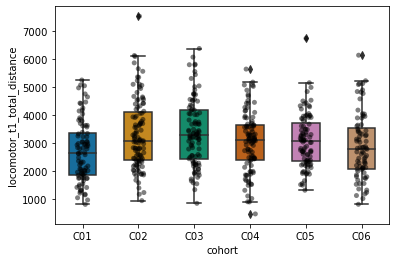

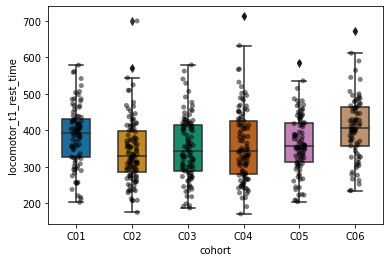

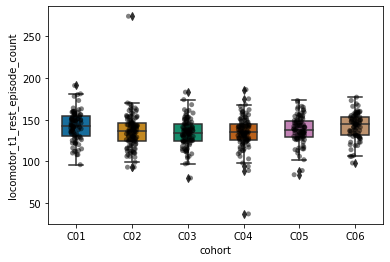

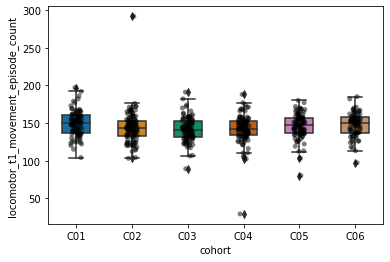

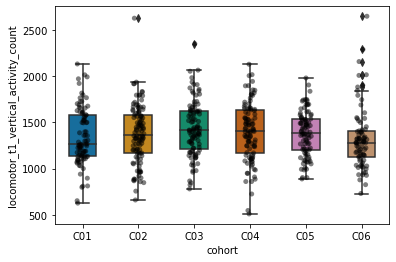

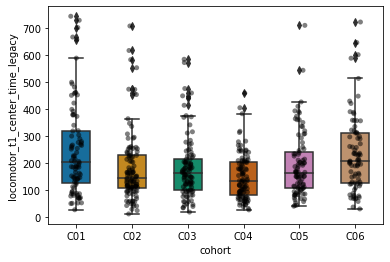

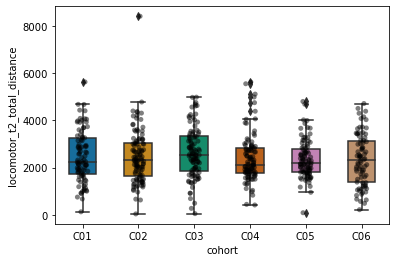

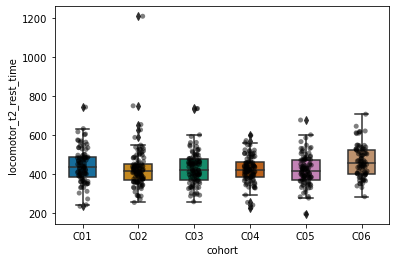

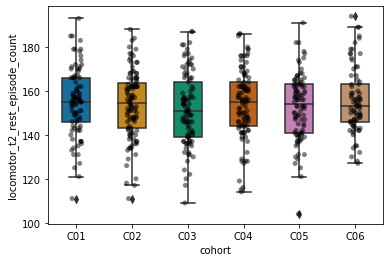

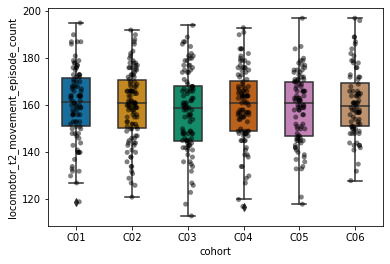

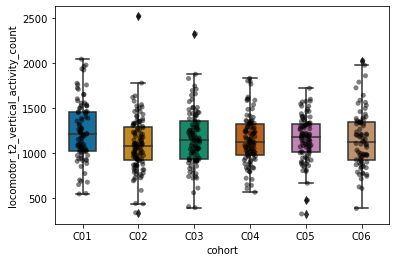

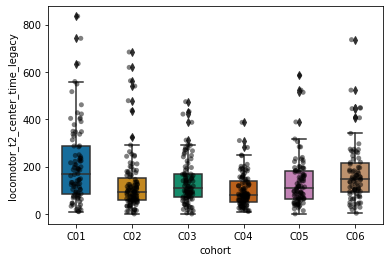

In [42]:
graph_columns = ['locomotor_t1_total_distance',
 'locomotor_t1_rest_time',
 'locomotor_t1_rest_episode_count',
 'locomotor_t1_movement_episode_count',
 'locomotor_t1_vertical_activity_count',
 'locomotor_t1_center_time_legacy',
 'locomotor_t2_total_distance',
 'locomotor_t2_rest_time',
 'locomotor_t2_rest_episode_count',
 'locomotor_t2_movement_episode_count',
 'locomotor_t2_vertical_activity_count',
 'locomotor_t2_center_time_legacy']
order_bin = pd.value_counts(df_groups['cohort']).sort_index().index
for col in graph_columns:
    sns.boxplot(y = col, x ='cohort', 
                     data = df_groups, 
                     width = 0.5,
                     palette = "colorblind",
                order = order_bin)

    sns.stripplot(y = col, x ='cohort',
                        data=df_groups, 
                        jitter=True, 
                        marker='o', 
                        alpha=0.5,
                        color='black',
                 order = order_bin)
    plt.show()

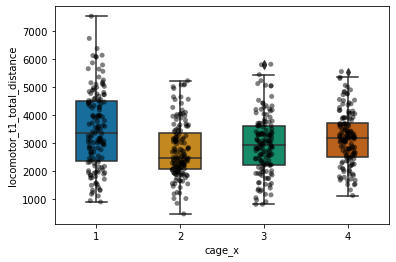

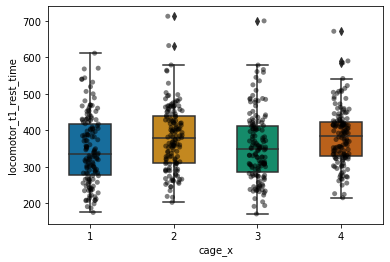

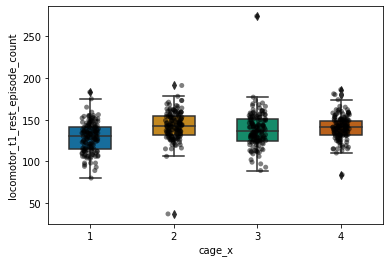

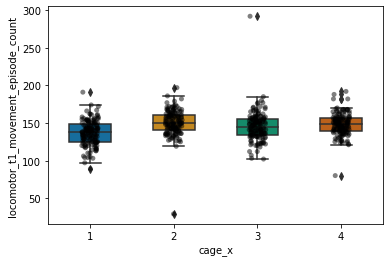

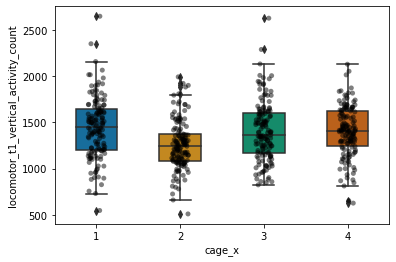

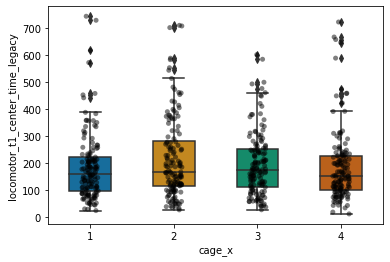

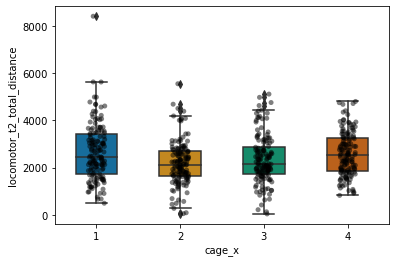

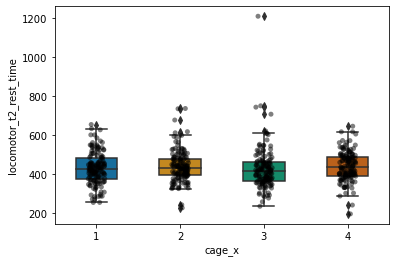

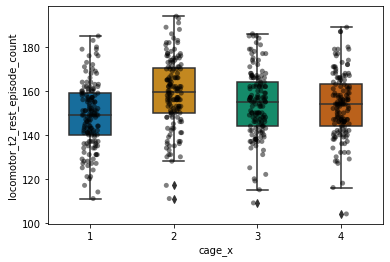

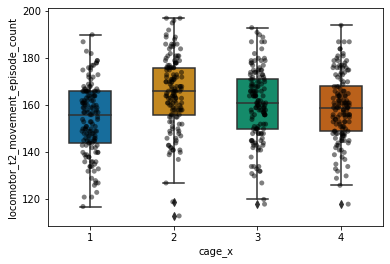

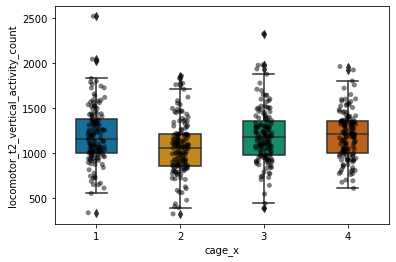

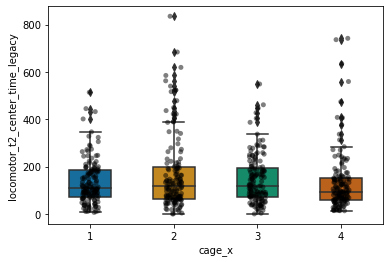

In [43]:
graph_columns = ['locomotor_t1_total_distance',
                 'locomotor_t1_rest_time',
                 'locomotor_t1_rest_episode_count',
                 'locomotor_t1_movement_episode_count',
                 'locomotor_t1_vertical_activity_count',
                 'locomotor_t1_center_time_legacy',
                 'locomotor_t2_total_distance',
                 'locomotor_t2_rest_time',
                 'locomotor_t2_rest_episode_count',
                 'locomotor_t2_movement_episode_count',
                 'locomotor_t2_vertical_activity_count',
                 'locomotor_t2_center_time_legacy']
order_bin = pd.value_counts(df_groups['cage_x']).sort_index().index

for col in graph_columns:
    sns.boxplot(y = col, x ='cage_x', 
                     data = df_groups, 
                     width = 0.5,
                     palette = "colorblind",
               order = order_bin)

    sns.stripplot(y = col, x ='cage_x',
                        data=df_groups, 
                        jitter=True, 
                        marker='o', 
                        alpha=0.5,
                        color='black',
                 order = order_bin)
    plt.show()

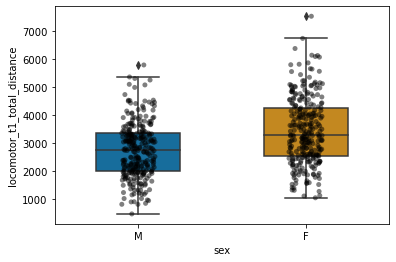

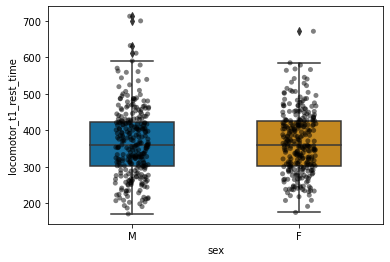

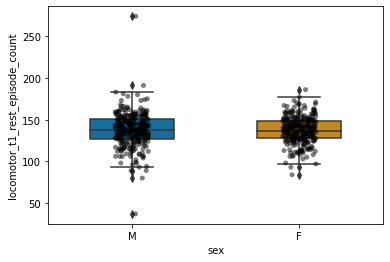

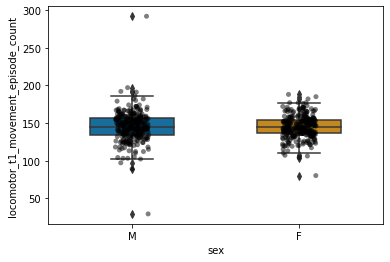

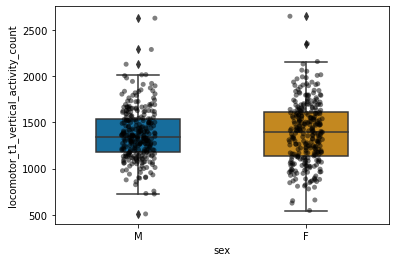

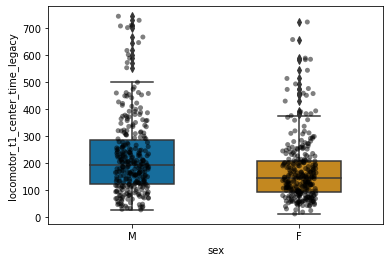

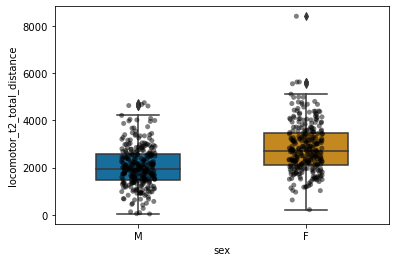

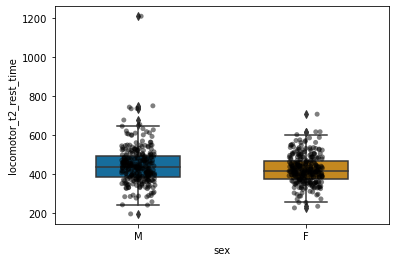

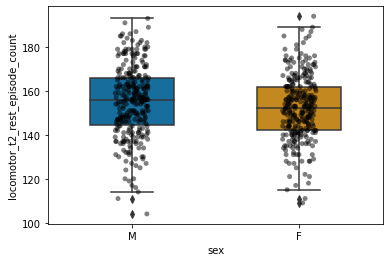

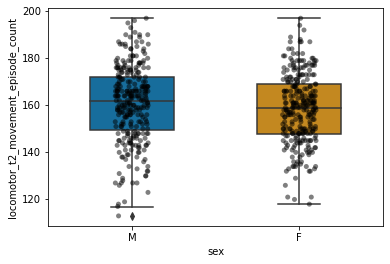

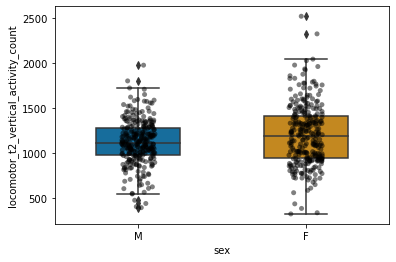

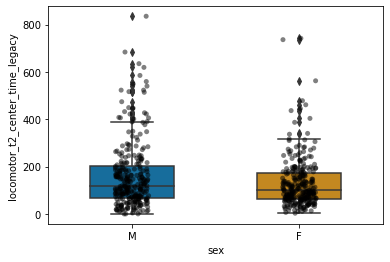

In [36]:
graph_columns = ['locomotor_t1_total_distance',
                 'locomotor_t1_rest_time',
                 'locomotor_t1_rest_episode_count',
                 'locomotor_t1_movement_episode_count',
                 'locomotor_t1_vertical_activity_count',
                 'locomotor_t1_center_time_legacy',
                 'locomotor_t2_total_distance',
                 'locomotor_t2_rest_time',
                 'locomotor_t2_rest_episode_count',
                 'locomotor_t2_movement_episode_count',
                 'locomotor_t2_vertical_activity_count',
                 'locomotor_t2_center_time_legacy']
for col in graph_columns:
    sns.boxplot(y = col, x ='sex', 
                     data = df_groups, 
                     width = 0.5,
                     palette = "colorblind")

    sns.stripplot(y = col, x ='sex',
                        data=df_groups, 
                        jitter=True, 
                        marker='o', 
                        alpha=0.5,
                        color='black')
    plt.show()

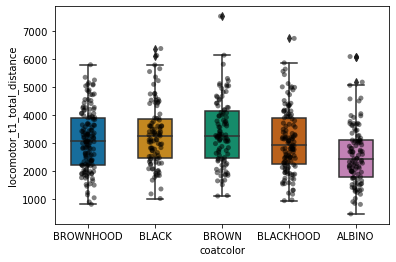

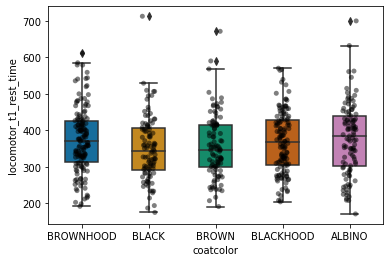

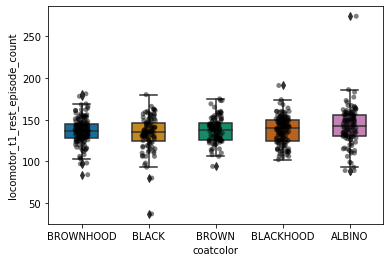

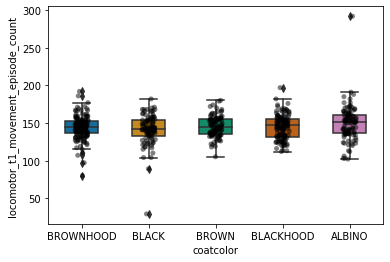

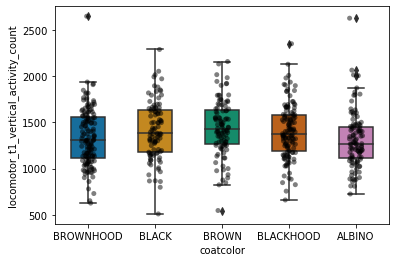

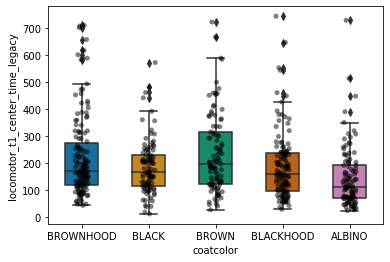

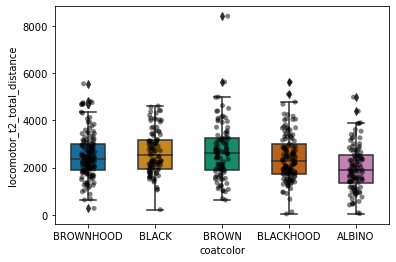

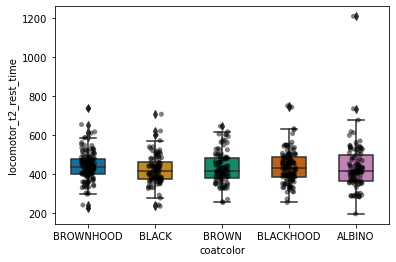

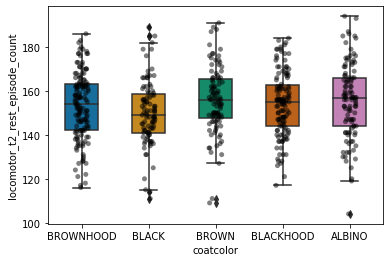

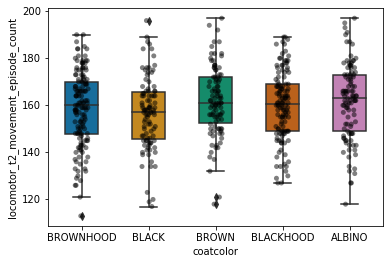

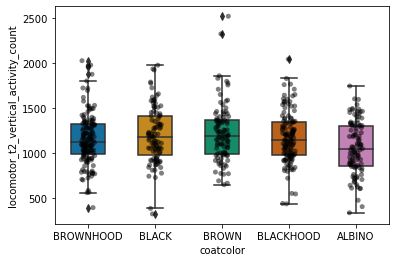

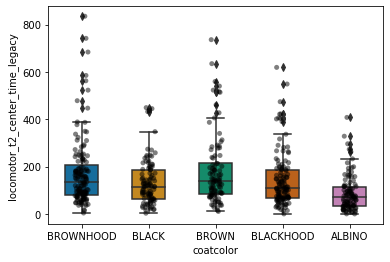

In [37]:
graph_columns = ['locomotor_t1_total_distance',
                 'locomotor_t1_rest_time',
                 'locomotor_t1_rest_episode_count',
                 'locomotor_t1_movement_episode_count',
                 'locomotor_t1_vertical_activity_count',
                 'locomotor_t1_center_time_legacy',
                 'locomotor_t2_total_distance',
                 'locomotor_t2_rest_time',
                 'locomotor_t2_rest_episode_count',
                 'locomotor_t2_movement_episode_count',
                 'locomotor_t2_vertical_activity_count',
                 'locomotor_t2_center_time_legacy']
for col in graph_columns:
    sns.boxplot(y = col, x ='coatcolor', 
                     data = df_groups, 
                     width = 0.5,
                     palette = "colorblind")

    sns.stripplot(y = col, x ='coatcolor',
                        data=df_groups, 
                        jitter=True, 
                        marker='o', 
                        alpha=0.5,
                        color='black')
    plt.show()

In [ ]:

#save locomotor file
#df_groups.to_csv(r'C:\Users\cocoy\Dropbox (Palmer Lab)\Palmer Lab\Shae Ziegler\Suzanne_Mitchell_U01\locomotor.csv', index=False)
#df_groups.to_csv(r'/Users/kendraziegler/Dropbox (Palmer Lab)/Palmer Lab/Shae Ziegler/Suzanne_Mitchell_U01/locomotor.csv', index=False)
